In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Dataset into a Pandas DataFrame

In [52]:
tesla_df = pd.read_csv("/Users/Pooja/Desktop/Data Projects/TSLA/TSLA.csv")

### Data PreProcessing

Previewing the first few records of the tesla_df to note the earliest stock date available.

In [53]:
tesla_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


Previewing the last few records of the tesla_df to note the latest stock date available.

In [54]:
tesla_df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
3529,3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
3533,3533,2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728


In [55]:
# Drop the 'Unnamed: 0' column as it is not needed
tesla_df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop duplicates
tesla_df.drop_duplicates()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400


Let's examine the data structure of dataset.

In [56]:
# Print column data type
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3534 non-null   object 
 1   Open    3534 non-null   float64
 2   High    3534 non-null   float64
 3   Low     3534 non-null   float64
 4   Close   3534 non-null   float64
 5   Volume  3534 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 165.8+ KB


Because 'Date' column is an object datatype, convert it into a datetime format

In [57]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3534 non-null   datetime64[ns]
 1   Open    3534 non-null   float64       
 2   High    3534 non-null   float64       
 3   Low     3534 non-null   float64       
 4   Close   3534 non-null   float64       
 5   Volume  3534 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 165.8 KB


Financial stock data is time series data. Each stock price is associated with a particular date. To make it easier, 'Date' should be set as an index. This will help in data manipulation, filtering, and sorting. 

Here, we set the 'Date' column as an index.

In [58]:
tesla_df.set_index('Date', inplace=True)

# Sort the DataFrame based on the index in descending order
tesla_df.sort_index(ascending=False, inplace=True)
tesla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728
2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900


In [59]:
# Display summary statistics
tesla_df.describe()

,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,74.997811,76.642865,73.249666,74.985912,9.694511e+07
std,102.281381,104.556354,99.811577,102.217353,7.877581e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,11.448667,11.753834,11.191166,11.532334,4.749600e+07
50%,17.417334,17.645333,17.064000,17.400333,8.216325e+07
75%,159.177502,161.312500,153.632500,158.180004,1.228650e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [60]:
# Count the missing values
tesla_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Exploratory Data Analysis 

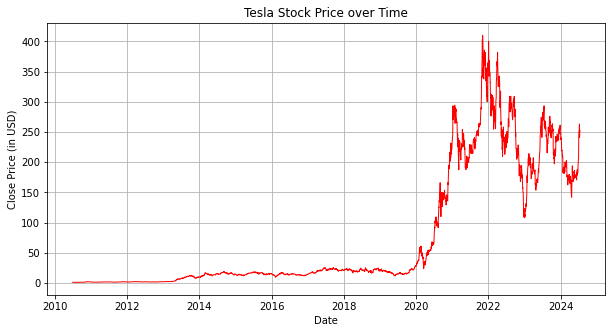

In [64]:
# Plotting the stock price over time

plt.figure(figsize=(10,5))
plt.plot(tesla_df.index, tesla_df['Close'], color='red', linestyle='-', linewidth=1)

plt.title("Tesla Stock Price over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (in USD)")

plt.grid(True)

plt.show()

The plot illustrates Tesla's closing stock prices over time, revealing a general upward trend that reflects significant appreciation in the company’s stock value. This trajectory suggests robust market performance and increasing investor confidence.

From 2010 to 2019, the stock experienced slow, steady growth, a period during which Tesla solidified its position in the market. However, post-2020, there was a marked acceleration in stock prices, indicative of heightened investor interest and potential milestones related to the electric vehicle sector.

By 2022, the stock exhibited notable volatility, characterized by sharp increases, likely driven by strong financial results, innovative product launches, or shifts in market dynamics. In 2023, there appears to be a decline in stock prices, which may reflect challenges faced by the company or broader market conditions affecting investor sentiment.